In [1]:
import numpy as np
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Load in the train csv data set via numpy
def load_data(file_path):
    if not os.path.exists(file_path):
        print(f"File {file_path} does not exist.")
        sys.exit(1)
    data = pd.read_csv(file_path, delimiter=' ', header=None)
    return data

train_df = load_data('train_FD001.csv')

train_df.head()
train_df.drop(labels=[26, 27], axis=1, inplace=True)
train_df.head()




,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [3]:
# Function to calculate the remaining flights for each engine
def calculate_remaining_flights(data):
    # Group by engine ID and find the maximum cycle for each engine
    max_cycles = data.groupby(0)[1].max().reset_index()
    max_cycles.columns = [0, 'max_cycle']
    
    # Merge to get the remaining flights
    data = data.merge(max_cycles, on=0)
    data['remaining_flights'] = data['max_cycle'] - data[1]
    
    return data


In [4]:
# Calculate the remaining flights for the training data
train_df = calculate_remaining_flights(train_df)
# Display the first few rows of the modified training data
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,max_cycle,remaining_flights
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187


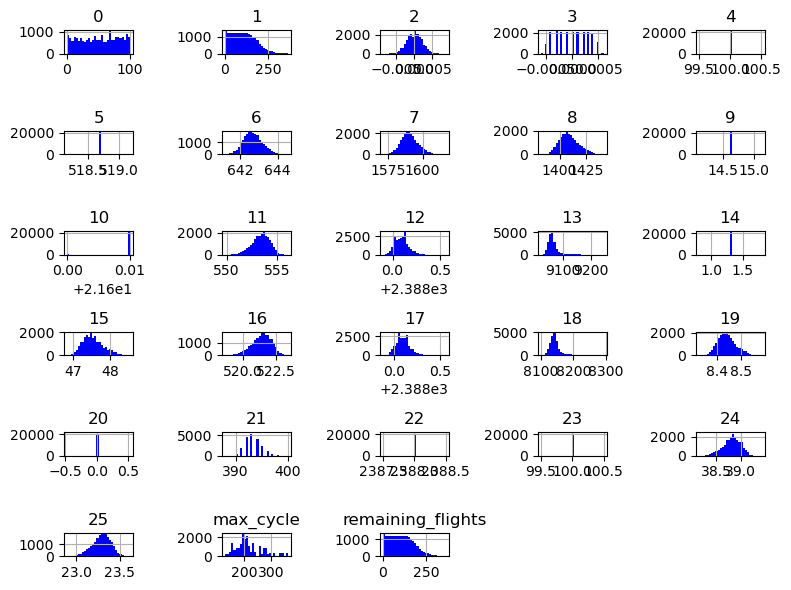

In [5]:
# Investigate the dataset

train_df.hist(bins=30, figsize=(8,6), color='b')
plt.tight_layout()
plt.show()

correlation_matrix = train_df.iloc[:,1:-1].corr()

In [6]:
# Build the correlation matrix from columns 1 through -2 of train_df
correlation_matrix = train_df.iloc[:, 1:-1].corr()

# Select the 2nd column of that matrix (0-based index 1)
col = correlation_matrix.iloc[:, 1]

# Build your mask: NaNs or exact zeros
mask = col.isna() | (col == 0)

# 1) If you want the actual **column names** (labels) whose correlation is bad:
bad_labels = col.index[mask].tolist()
print("Columns with NaN or 0 correlation:", bad_labels)

# 2) If you instead want their **integer positions** within this correlation matrix:
bad_positions = np.where(mask)[0]         # 0-based positions
bad_positions_one_based = bad_positions + 1
print("Bad Sensors 1-based positions:", bad_positions_one_based)

# Drop the bad sensors from the training data
train_df.drop(columns=bad_labels, inplace=True)

first_col = train_df.columns[0]
second_col = train_df.columns[1]
targets_df = train_df[['max_cycle', 'remaining_flights' ]].copy()
train_df = train_df.drop([ first_col, second_col ,'max_cycle', 'remaining_flights' ], axis=1)

print(targets_df.head())
print(train_df.head())



Columns with NaN or 0 correlation: [4, 5, 9, 14, 20, 22, 23]
Bad Sensors 1-based positions: [ 4  5  9 14 20 22 23]
   max_cycle  remaining_flights
0        192                191
1        192                190
2        192                189
3        192                188
4        192                187
        2       3       6        7        8     10      11       12       13  \
0 -0.0007 -0.0004  641.82  1589.70  1400.60  21.61  554.36  2388.06  9046.19   
1  0.0019 -0.0003  642.15  1591.82  1403.14  21.61  553.75  2388.04  9044.07   
2 -0.0043  0.0003  642.35  1587.99  1404.20  21.61  554.26  2388.08  9052.94   
3  0.0007  0.0000  642.35  1582.79  1401.87  21.61  554.45  2388.11  9049.48   
4 -0.0019 -0.0002  642.37  1582.85  1406.22  21.61  554.00  2388.06  9055.15   

      15      16       17       18      19   21     24       25  
0  47.47  521.66  2388.02  8138.62  8.4195  392  39.06  23.4190  
1  47.49  522.28  2388.07  8131.49  8.4318  392  39.00  23.4236  
2  47.27  522.

In [7]:
# normalize the training data sensors dataframe
from sklearn.preprocessing import MinMaxScaler
features=list(train_df.columns)
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
train_df[features] = min_max_scaler.fit_transform(train_df[features])

print("Normalized training data:")
train_df.head()

Normalized training data:


,2,3,6,7,8,10,11,12,13,15,16,17,18,19,21,24,25
0,-0.080460,-0.666667,-0.632530,-0.186396,-0.380486,1.0,0.452496,-0.515152,-0.780490,-0.261905,0.266525,-0.588235,-0.600784,-0.272028,-0.333333,0.426357,0.449323
1,0.218391,-0.500000,-0.433735,-0.093961,-0.294733,1.0,0.256039,-0.575758,-0.799515,-0.238095,0.530917,-0.441176,-0.674373,-0.177376,-0.333333,0.333333,0.462027
2,-0.494253,0.500000,-0.313253,-0.260955,-0.258947,1.0,0.420290,-0.454545,-0.719914,-0.500000,0.590618,-0.558824,-0.656414,-0.285110,-0.666667,0.255814,0.242751
3,0.080460,0.000000,-0.313253,-0.487683,-0.337610,1.0,0.481481,-0.363636,-0.750965,-0.666667,0.778252,-0.411765,-0.650222,-0.666795,-0.333333,0.147287,0.324772
4,-0.218391,-0.333333,-0.301205,-0.485066,-0.190749,1.0,0.336554,-0.515152,-0.700081,-0.488095,0.492537,-0.529412,-0.650532,-0.195845,-0.166667,0.178295,0.409003


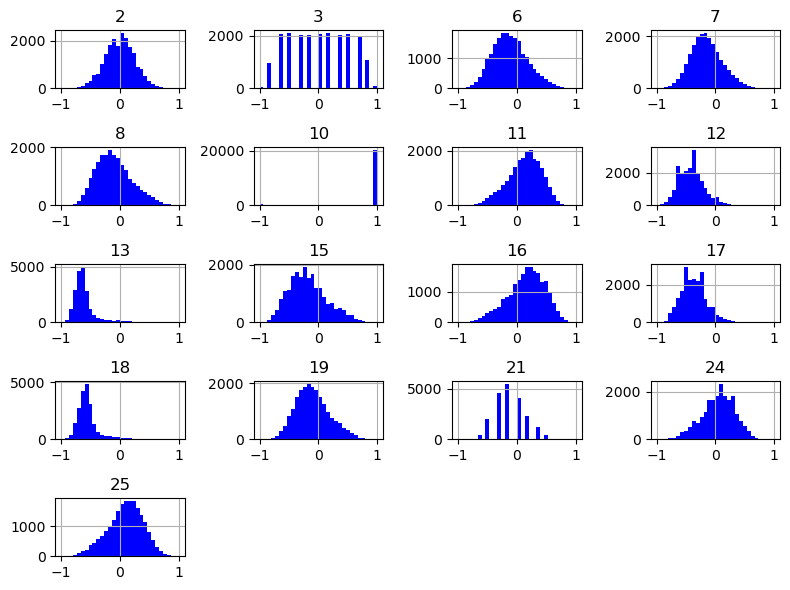

In [8]:
train_df.hist(bins=30, figsize=(8,6), color='b')
plt.title('Normalized Training Data Histogram')
plt.tight_layout()
plt.show()

# Gaussian Process Time
Now that the data has been preprocessed, lets finally fit a GPR.
The RBF kernel is on of the most popular GPR kernels, but the estimate returns to mean zero when the data runs out. 
This is not good for our application, but since we know something about the nature of the data, we can engineer a kernel to work with
our dataset.

        Kernel = RBF + Linear

Comparisons will be made with using different populat kernel functions aswell as the combined kernels

In [9]:
import tensorflow as tf

print("GPUs:", tf.config.list_physical_devices('GPU'))

import gpflow
from gpflow.utilities import print_summary

train_x = train_df.to_numpy().astype(np.float64)
train_y = targets_df['remaining_flights'].to_numpy().astype(np.float64)

# take the firs 1000 points for training
train_x = train_x[:1000, :]
train_y = train_y[:1000]

if train_x.ndim == 1:
    train_x = train_x[:, None]
if train_y.ndim == 1:
    train_y = train_y[:, None]

linear_kern = gpflow.kernels.Linear()
rbf_kern = gpflow.kernels.SquaredExponential()
kernel = linear_kern + rbf_kern

mean_func = gpflow.mean_functions.Constant()

model = gpflow.models.GPR(
    data=(train_x, train_y),
    kernel=kernel,
    mean_function=mean_func
)
model.likelihood.variance.assign(1e-2)

print_summary(model)

optimizer = tf.optimizers.Adam(learning_rate=0.01)

@tf.function
def optimization_step():
    with tf.GradientTape() as tape:
        loss = model.training_loss()
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    return loss

training_iter = 100
for i in range(1, training_iter + 1):
    loss = optimization_step()
    
    print(
        f"Iter {i:3d}/{training_iter:3d} — Loss: {loss:.3f}  "
        f"RBF ℓ = {rbf_kern.lengthscales.numpy():.3f}  "
        f"noise = {model.likelihood.variance.numpy():.3f}"
        )

print_summary(model)


GPUs: []



╒════════════════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤══════════════════════╕
│ name                               │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │ value                │
╞════════════════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪══════════════════════╡
│ GPR.mean_function.c                │ Parameter │ Identity         │         │ True        │ (1,)    │ float64 │ [0.]                 │
├────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼──────────────────────┤
│ GPR.kernel.kernels[0].variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 0.9999999999999999   │
├────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼──────────────────────┤
│ GPR.kernel.kernels[1].varia

In [10]:
# Use the last 1000 points for testing
test_x = train_x[-1000:, :]
test_y = train_y[-1000:]
# Make predictions
mean, var = model.predict_f(test_x)
# Calculate the standard deviation
std_dev = np.sqrt(var.numpy())

print(abs(mean - test_y))
print("Variance of predictions:", var.numpy().flatten())

tf.Tensor(
[[6.57085342e+00]
 [4.48688756e+00]
 [3.01770018e+00]
 [3.53830229e+00]
 [1.68707996e+01]
 [2.53145014e+00]
 [9.69931631e+00]
 [7.22405171e-01]
 [2.06374936e+00]
 [7.03684793e-01]
 [3.47499937e+00]
 [2.94204869e+00]
 [3.00460974e+00]
 [1.22514730e+00]
 [4.45022692e+00]
 [1.64090258e+00]
 [8.64173987e+00]
 [4.70918085e+00]
 [2.05864824e+00]
 [9.52063552e-01]
 [2.87128357e+00]
 [7.23989773e+00]
 [3.66799662e+00]
 [7.08430960e+00]
 [1.16081830e+00]
 [6.17437234e-01]
 [5.27433487e+00]
 [1.57168885e+00]
 [5.35376732e+00]
 [4.69655715e-02]
 [1.43835658e+00]
 [2.91677843e+00]
 [1.04211963e+00]
 [2.71757527e+00]
 [4.07377674e+00]
 [9.58501043e+00]
 [1.20050926e+00]
 [7.97813000e-02]
 [1.25134884e-01]
 [1.00922934e+00]
 [2.87163454e+00]
 [2.10244170e+00]
 [1.89632771e+00]
 [1.74308445e+00]
 [4.38448392e+00]
 [4.32977055e+00]
 [5.22597803e+00]
 [7.48874681e-01]
 [4.71660235e-01]
 [3.46586851e+00]
 [6.21126534e-01]
 [1.50202866e+00]
 [9.23535468e-01]
 [3.44976561e-01]
 [6.48874936e+00]